# Homework 2

## Problem 1 -  Dollar Profits
- "rets" variable below is a DataFrame containing randomly generated, hypothetical daily returns. Rows represent days and columns represent symbols.
- dollarpos variable below is a DataFrame containing randomly generated initial dollar positions in each symbol at the close of market the prior day. 
- Compute the dollar profit in each symbol on a given day as a DataFrame
- Plot the cumulative dollar profit in A through time

In [6]:
import numpy as np 
import pandas as pd 

np.random.seed(5)
rets = np.random.normal(0.05/252,0.1/np.sqrt(252), (1000,5))
# print(rets)
columns = ['A','B','C','D','E']
rets = pd.DataFrame(rets,columns = columns)



In [9]:
dollarpos = np.random.normal(1000,100, (1000,5))
dollarpos = pd.DataFrame(dollarpos,columns = columns).abs()
dollarpos

,A,B,C,D,E
0,969.435120,1027.215525,1109.636689,1042.110166,1095.286320
1,959.343878,957.338385,955.540095,851.327779,1044.989408
2,1000.569673,759.470504,1021.568818,1036.476000,1059.721183
3,892.933947,1007.354213,1098.558250,1082.529413,1116.041801
4,924.814142,890.356149,808.912009,905.936166,942.853169
...,...,...,...,...,...
995,1039.747391,1064.411566,1025.485418,912.116929,944.688579
996,1080.180082,802.862184,1056.385018,1093.317323,1122.221285
997,866.823364,984.165450,1000.250988,973.932784,875.675248
998,1137.538983,1073.235714,1022.472431,850.156801,936.753124


In [11]:
profit = dollarpos * rets
profit

,A,B,C,D,E
0,2.886866,-1.937198,17.211388,-1.448136,0.973589
1,9.753752,-5.293328,-3.371669,1.175004,-1.964134
2,-7.319465,-0.829485,-2.106472,4.145828,-10.903227
3,-3.761306,7.506294,13.071193,-10.090391,4.754974
4,-5.529312,-4.629189,-4.282307,-2.231445,6.105345
...,...,...,...,...,...
995,0.725781,0.377532,10.140699,-5.184344,-5.108446
996,-4.466281,-7.985909,2.331793,-1.668189,-12.917207
997,-4.578614,-0.990845,1.392995,-3.403564,9.909714
998,-4.809037,5.385678,-12.183738,7.764003,-5.870869


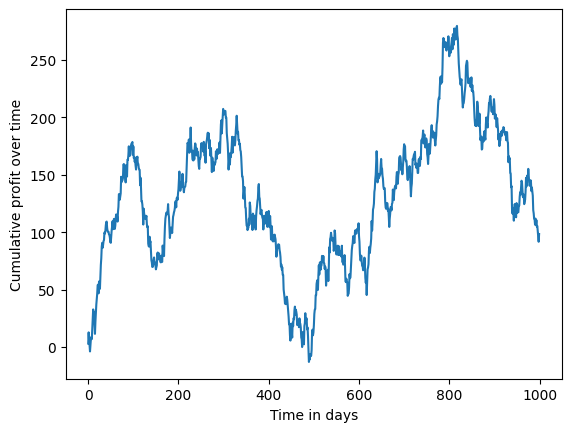

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to show scatter plots between all pairs of items
# sns.pairplot(profit)
# plt.suptitle('Pairwise Scatter Plots of Items', y=1.02)  # Title adjustment for better spacing

# Plotting cumulative profit in A
cumulative_profit_A = profit['A'].cumsum()

plt.plot(cumulative_profit_A)
plt.xlabel('Time in days')
plt.ylabel('Cumulative profit over time')
plt.show()


## Problem 2 - Performance Stats 
- "rets" variable below is a DataFrame containing randomly generated, hypothetical daily returns. Rows represent days and columns represent symbols.
- Please complete the function "compute_stats".
- compute_stats takes as input rets and returns a new DataFrame (stats) containing performance stats as specified below. rows of the result should be symbols and columns the performance stat label.
    1. "avg": average return (annualized)
    2. "vol": volatility (annualized)
    3. "sharpe": sharpe ratio (annualzied)
    4. "hit_rate": percent of returns which are positive
- Plot the sharpe ratios in "stats" in ascending order.

In [ ]:
import numpy as np 
import pandas as pd 

np.random.seed(5)
rets = np.random.normal(0.05/252,0.1/np.sqrt(252), (1000,5))
columns = ['A','B','C','D','E']
rets = pd.DataFrame(rets,columns = columns)

In [33]:
def compute_stats(rets):
    # fill out the body here
    # return a DataFrame "stats"
    # columns should be performance stat label
    # rows should be symbols
    stats = np.full((5, 4), None, dtype=float)
    new_columns = ["avg", "vol", "sharpe", "hit_rate"]
    stats = pd.DataFrame(stats, columns=new_columns)
    # print(stats)

    annualization_factor = 252
    # iterate over columns in returns
    for counter, column in enumerate(rets.columns):
        # print(rets[column])
        avg = rets[column].mean() * annualization_factor
        volatility = rets[column].std() * np.sqrt(annualization_factor)
        sharpe = avg / volatility if volatility != 0 else 0
        hit_ratio = (rets[column]>0).mean() * 100

        stats.at[counter, 'avg'] = avg
        stats.at[counter, 'vol'] = volatility
        stats.at[counter, 'sharpe'] = sharpe
        stats.at[counter, 'hit_rate'] = hit_ratio

    return stats

compute_stats(rets)

,avg,vol,sharpe,hit_rate
0,0.028730,0.101799,0.282224,52.1
1,0.120800,0.099772,1.210766,52.0
2,0.018690,0.103599,0.180409,51.4
3,0.051331,0.100662,0.509934,51.8
4,0.013511,0.101800,0.132720,51.3


## Problem 3 - Simple Reversal Signal
- "rets" variable below is a DataFrame containing randomly generated, hypothetical daily returns. Rows represent days and columns represent symbols
- Please complete the function "reversal_signal"
- reversal_signal takes as input rets and returns a new DataFrame (signal) which has the same rows/columns as rets. The values of signal are 1 if the symbol had the worst return that day, -1 if it had the best return, and 0 otherwise. 
- plot the value of signal through time for "A"

Hint: Try to construct a boolean DataFrame first and then convert it to an integer DataFrame

In [43]:
import numpy as np 
import pandas as pd 

np.random.seed(5)
rets = np.random.normal(0.05/252,0.1/np.sqrt(252), (1000,5))
columns = ['A','B','C','D','E']
rets = pd.DataFrame(rets,columns = columns)

In [45]:
def reversal_signal(rets):
    # fill out the body here
    # return a DataFrame "signal"
    # signal has same index/columns as rets
    # the value in signal is  1 if the symbol had the worst return on
    # a particular day, -1 if it had the best, and 0 otherwise
    signal = np.full((1000, 5), 0, dtype=int)
    signal = pd.DataFrame(signal, columns=columns)

    for index, row in rets.iterrows():
        max_val = row.max()
        min_val = row.min()
        for counter,val in enumerate(row):
            if val == max_val:
                signal.iloc[index, counter] = -1
            elif val == min_val:
                signal.iloc[index, counter] = 1
            
            
    return signal

In [46]:
signal = reversal_signal(rets)
signal

,A,B,C,D,E
0,0,1,-1,0,0
1,-1,1,0,0,0
2,0,0,0,-1,1
3,0,0,-1,1,0
4,1,0,0,0,-1
...,...,...,...,...,...
995,0,0,-1,1,0
996,0,0,-1,0,1
997,1,0,0,0,-1
998,0,0,1,-1,0


<Axes: >

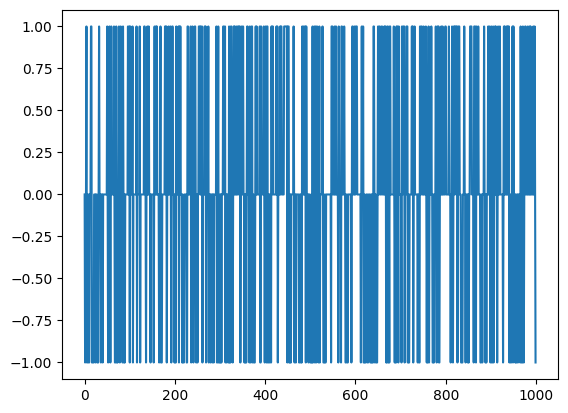

In [48]:
signal['A'].plot()